In [1]:
import torch
import numpy
import matplotlib.pyplot as plt

In [2]:
torch.manual_seed(1)

In [3]:
#fake data
x = torch.unsqueeze(torch.linspace(-1,1,100),dim=1)#x data (tensor),shape=(100,1)
y = x.pow(2) + 0.2*torch.randn(x.size())#nosiy y data (tensor),shape=(100,1)


In [17]:
def save():
    net1 = torch.nn.Sequential(
        torch.nn.Linear(1,10),
        torch.nn.ReLU(),
        torch.nn.Linear(10,1)
    )
    optimizer = torch.optim.SGD(net1.parameters(),lr=0.5)
    loss_func = torch.nn.MSELoss()
    
    for t in range(100):
        prediction = net1(x)
        loss = loss_func(prediction,y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    torch.save(net1,'net1.pkl')
    torch.save(net1.state_dict(),'net1_params.pkl')
    
    plt.figure(1,figsize=(10,3))
    plt.subplot(131)
    plt.title('Net1')
    plt.scatter(x.data.numpy(),y.data.numpy())
    plt.plot(x.data.numpy(),prediction.data.numpy(),'r-',lw=5)

In [22]:
def restore_net():
    net2 = torch.load('net1.pkl')
    prediction = net2(x)
    
    plt.figure(1,figsize=(10,3))
    plt.subplot(132)
    plt.title('Net2')
    plt.scatter(x.data.numpy(),y.data.numpy())
    plt.plot(x.data.numpy(),prediction.data.numpy(),'r-',lw=5)

In [27]:
def restore_param():
    net3 = torch.nn.Sequential(
        torch.nn.Linear(1,10),
        torch.nn.ReLU(),
        torch.nn.Linear(10,1)
    )
    net3.load_state_dict(torch.load('net1_params.pkl'))
    prediction = net3(x)
    
    plt.figure(1,figsize=(10,3))
    plt.subplot(133)
    plt.title('Net3')
    plt.scatter(x.data.numpy(),y.data.numpy())
    plt.plot(x.data.numpy(),prediction.data.numpy(),'r-',lw=5)

C:\Users\tanling\Anaconda3\lib\site-packages\torch\serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Sequential. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
C:\Users\tanling\Anaconda3\lib\site-packages\torch\serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Linear. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
C:\Users\tanling\Anaconda3\lib\site-packages\torch\serialization.py:292: UserWarning: Couldn't retrieve source code for container of type ReLU. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


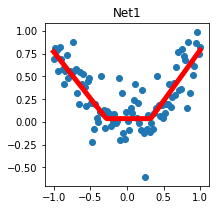

In [24]:
save()

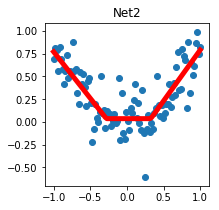

In [25]:
restore_net()

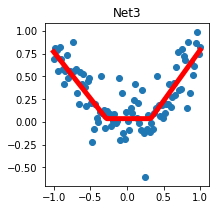

In [28]:
restore_param()